## Data Wrangling and Web Scraping

Data wrangling is the process of collecting data and transforming it into a usable form. For this project on drafting NFL running backs, we were able to find our data available on various web sites. In order to properly "wrangle" this data, we would need to find a way of taking it from a web site and transforming into a CSV file. Having our data in CSV files would allow us to run data analysis later.

We were interested in three different subjects of data: college football statistics, NFL statistics for the rookie running backs of each year, and NFL statistics for all running backs of each year. The web sites that we specifically accessed have been mentioned in the 'Project Proposal' portion of this project. 

### College Football and NFL Rookie Statistics

When data collecting began, we were not yet aware of how to utilize the process of web scraping in order to obtain our data. Thus, we manually copied the college football statistics and the NFL rookie statistics into Excel spreadsheets, which we were then able to save as a CSV file. While we were certain that we would not be missing any information by doing this, we wanted to check anyway. Below is the code for checking for missing values in one year of both the college statistics and the NFL rookie statistics. Note that we separated each set of statistics into a different CSV file for each year so that we could more easily determine when the data was coming from.

In [7]:
# Import the pandas module so that we may use data frames, and the numpy module so that we may use NaNs. 
import pandas as pd
import numpy as np
# Import these packages so that we may plot our missing values.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Imports the data from our CSV file into a data frame, which we can perform data analysis on.
cf_09 = pd.DataFrame.from_csv('data/College_FB_2009.csv', index_col=None, encoding='utf-8')
# The source of this data represents missing values with '--', so we need to transform them to NaNs for us to count.
cf_09 = cf_09.replace('--', np.nan)
cf_09.head()

,Player,Team,Att,Gain,Loss,Yds,Avg,Lg,TD
0,Toby Gerhart,STAN,343.0,1913.0,42.0,1871.0,5.45,NaN,28.0
1,Ryan Mathews,FRES,276.0,1850.0,42.0,1808.0,6.55,NaN,19.0
2,Dion Lewis,PITT,325.0,1862.0,63.0,1799.0,5.54,NaN,17.0
3,Mark Ingram,ALA,271.0,1678.0,20.0,1658.0,6.12,NaN,17.0
4,Ryan Williams,VT,293.0,1720.0,65.0,1655.0,5.65,NaN,21.0


In [8]:
# We want to count the number of null values in the cf_09 data frame. 
cf_09_c = cf_09.copy()
c = cf_09_c.isnull().sum().sort_values(ascending = False)/len(cf_09_c.index)
c

Lg        1.0
TD        0.0
Avg       0.0
Yds       0.0
Loss      0.0
Gain      0.0
Att       0.0
Team      0.0
Player    0.0
dtype: float64

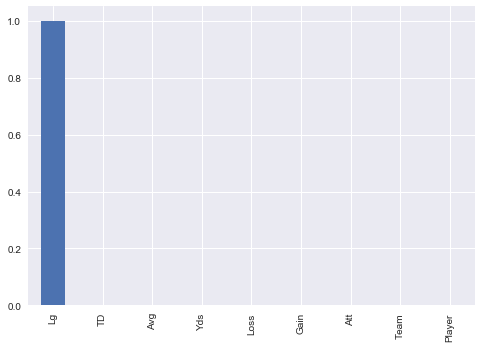

In [9]:
# Plots the percentage of missing values for each column.
c.plot(kind='bar');

As we can see, the college football statistics for 2009 is missing all of the information on longest run. However, it does not have any other missing information. We will consider this to be acceptable because all of the data has the same column of information missing.

In [10]:
# Typically we would have the same import statements here as before. However, since we have already imported our necessary 
# modules earlier, we can leave the import statements out of this code block.

nr_10 = pd.DataFrame.from_csv('data/NFL_Rookies_2010.csv', index_col=None, encoding='utf-8')
nr_10 = nr_10.replace('--', np.nan)
nr_10.head()

,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Lng,1st,1st%,20+,40+,FUM
0,1,LeGarrette Blount,TB,RB,201,15.5,1007,5.0,77.5,6,53,38,18.9,10,3,3
1,2,Chris Ivory,NO,RB,137,11.4,716,5.2,59.7,5,55T,44,32.1,5,1,4
2,3,Ryan Mathews,SD,RB,158,13.2,678,4.3,56.5,7,31T,25,15.8,4,0,4
3,4,Jahvid Best,DET,RB,171,10.7,555,3.2,34.7,4,45,25,14.6,3,1,1
4,5,James Starks,GB,RB,29,9.7,101,3.5,33.7,0,16,5,17.2,0,0,0


In [11]:
nr_10_c = nr_10.copy()
nr = nr_10_c.isnull().sum().sort_values(ascending = False)/len(nr_10_c.index)
nr

FUM       0.0
40+       0.0
20+       0.0
1st%      0.0
1st       0.0
Lng       0.0
TD        0.0
Yds/G     0.0
Avg       0.0
Yds       0.0
Att/G     0.0
Att       0.0
Pos       0.0
Team      0.0
Player    0.0
Rk        0.0
dtype: float64

Without even plotting, we can see that this data is not missing any information. Note that we started our NFL data collection with the year 2010 because the earliest year of college statistics we could obtain was in 2009.

### NFL Running Back Statistics and Web Scraping

By the time we were ready to obtain statistics on the entire pool of NFL running backs (regardless of whether or not they were rookies), we had learned how to do web scraping. In short, web scraping is the act of writing code that will access web sites and perform data collection for us. While we needed to make minor modifications to the code for each year, here is the code used to obtain the 2010 NFL running back statistics.

In [12]:
# Imports webdriver from the selenium module. This will allow our code to access the internet using a separate pop-up browser.
from selenium import webdriver
# It is important to note that we would normally need to import both pandas and numpy here as well. However, we have done this
# in an earlier code block, so we do not need to do it again now. 

# Open up the first page for the year we are working on.
browser = webdriver.Chrome()
browser.get('http://www.nfl.com/stats/categorystats?archive=true&conference=null&statisticPositionCategory=RUNNING_BACK&season=2010&seasonType=REG&experience=&tabSeq=1&qualified=true&Submit=Go')

# Create an empty data frame and create column headers.
df = pd.DataFrame()
column_headers = ['Rk', 'Player', 'Team', 'Pos', 'Att', 'Att/G', 'Yds', 'Avg', 'Yds/G', 'TD', 'Long', '1st Downs', '1st Down %', '20+', '40+', 'FUM']

# This loop will find all of the elements in the table, put them into a list and then add them to our data frame, then navigate 
# to the next page. 
while(True):
    # The 'td' was selected because this is the html tag that specifies all table entries on our web page.
    elems = browser.find_elements_by_tag_name('td')
    # Creates an empty list to put all found elements in.
    myList = list()
    i = 0
    while (i < len(elems)):
        myList.append(elems[i].text)
        i = i + 1
    # We create rows this way so that we have the correct number of rows (the last page may not have the same number of rows as 
    # the other pages). There are 16 columns, which is why we use 16. Then we create a temporary data frame to concatonate with 
    # our final data frame.
    rows = int(len(myList)/16)
    dftemp = pd.DataFrame(np.array(myList).reshape(rows,16), columns = column_headers)
    df = pd.concat([df, dftemp])
    # Every page except the last one has a button labeled 'next' that navigates to the next page. Once we have the exception, we
    # know we have finished with the last page, and so the loop breaks.
    try:
        linkElem = browser.find_element_by_link_text('next')
        linkElem.click()
    except: 
        break
        
# This prints out the data frame so that we may manually check that we received the correct number of entries.
df

,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Long,1st Downs,1st Down %,20+,40+,FUM
0,1,Arian Foster,HOU,RB,327,20.4,"1,616",4.9,101.0,16,74T,89,27.2,12,3,3
1,2,Maurice Jones-Drew,JAC,RB,299,21.4,"1,324",4.4,94.6,5,37,75,25.1,8,0,2
2,3,Jamaal Charles,KC,RB,230,14.4,"1,467",6.4,91.7,5,80,70,30.4,10,3,2
3,4,Darren McFadden,OAK,RB,223,17.2,"1,157",5.2,89.0,7,57T,45,20.2,14,4,3
4,5,Adrian Peterson,MIN,RB,283,18.9,"1,298",4.6,86.5,12,80T,70,24.7,9,2,1
5,6,Michael Turner,ATL,RB,334,20.9,"1,371",4.1,85.7,12,55,71,21.3,9,1,2
6,7,Chris Johnson,TEN,RB,316,19.8,"1,364",4.3,85.2,11,76T,55,17.4,13,4,2
7,8,Rashard Mendenhall,PIT,RB,324,20.2,"1,273",3.9,79.6,13,50T,61,18.8,11,1,2
8,9,Steven Jackson,STL,RB,330,20.6,"1,241",3.8,77.6,6,42T,60,18.2,7,1,1
9,10,Frank Gore,SF,RB,203,18.5,853,4.2,77.5,3,64,42,20.7,6,1,3


In [14]:
# This converts our data frame into a csv file. 
df.to_csv('data/NFL_Pro_2010.csv', index = False)

Now that we have obtained our CSV file, we should make sure that we can load it into a data frame and once again check for missing values.

In [15]:
# Typically we would have the same import statements here as our previous attempts at checking for nulls. However, since we 
# have already imported our necessary modules earlier, we can leave the import statements out of this code block.

np_10 = pd.DataFrame.from_csv('data/NFL_Pro_2010.csv', index_col=None, encoding='utf-8')
np_10 = np_10.replace('--', np.nan)
np_10.head()

,Rk,Player,Team,Pos,Att,Att/G,Yds,Avg,Yds/G,TD,Long,1st Downs,1st Down %,20+,40+,FUM
0,1,Arian Foster,HOU,RB,327,20.4,"1,616",4.9,101.0,16,74T,89,27.2,12,3,3
1,2,Maurice Jones-Drew,JAC,RB,299,21.4,"1,324",4.4,94.6,5,37,75,25.1,8,0,2
2,3,Jamaal Charles,KC,RB,230,14.4,"1,467",6.4,91.7,5,80,70,30.4,10,3,2
3,4,Darren McFadden,OAK,RB,223,17.2,"1,157",5.2,89.0,7,57T,45,20.2,14,4,3
4,5,Adrian Peterson,MIN,RB,283,18.9,"1,298",4.6,86.5,12,80T,70,24.7,9,2,1


In [18]:
np_10_c = np_10.copy()
np = np_10_c.isnull().sum().sort_values(ascending = False)/len(np_10_c.index)
np

FUM           0.0
40+           0.0
20+           0.0
1st Down %    0.0
1st Downs     0.0
Long          0.0
TD            0.0
Yds/G         0.0
Avg           0.0
Yds           0.0
Att/G         0.0
Att           0.0
Pos           0.0
Team          0.0
Player        0.0
Rk            0.0
dtype: float64

Once again, we can see that this data is not missing any information. Thus, our data wrangling is complete, and we can move on to the next section of our project.